

> # Salários Profissionais de Data Science 2023



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

pd.set_option('display.max_rows', 10000)
df = pd.read_csv("ds_salaries.csv")
#teste
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [9]:
len(df)

3755

In [10]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Apesar de algumas linhas do dataset parecerem duplicadas, não removemos essas “duplicatas”. Isso porque elas não representam erros, e sim pessoas diferentes que têm exatamente as mesmas características registradas (mesmo cargo, país, nível de experiência etc.). Cada linha é uma observação válida e corresponde a um profissional real com um salário específico. Se removêssemos essas entradas, acabaríamos perdendo informação útil e prejudicando tanto a análise quanto o desempenho dos modelos.

In [11]:
df.duplicated().sum()

np.int64(1171)

In [12]:
df = df.drop('salary', axis=1)
df.head(50)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M


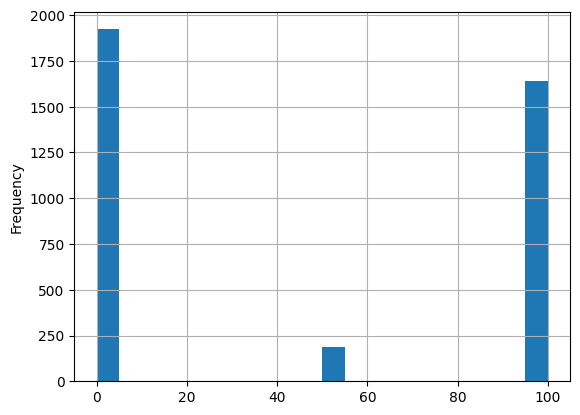

In [13]:
hist =  df.remote_ratio.plot.hist(bins=20)
plt.grid()

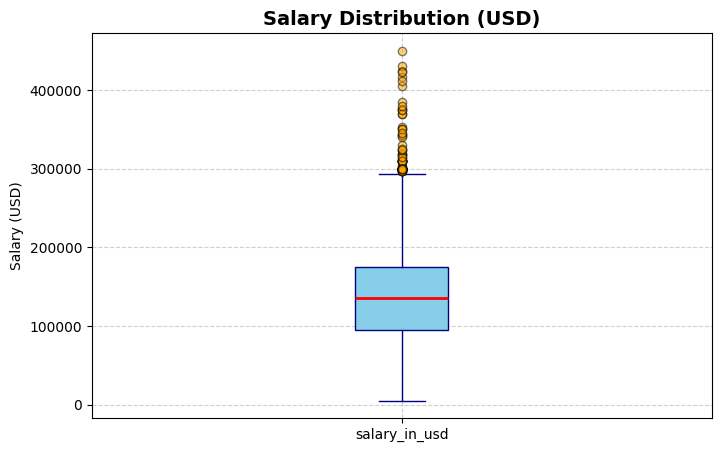

Primeiro quartil:  95000.0
Segundo quartil:  135000.0
Terceiro quartil:  175000.0
Limite superior :  295000.0
Limite inferior :  -25000.0


In [14]:
plt.figure(figsize=(8, 5))
box = df.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

q1 = df['salary_in_usd'].quantile(.25)
q2 = df['salary_in_usd'].quantile(.50)
q3 = df['salary_in_usd'].quantile(.75)

print("Primeiro quartil: ", q1)
print("Segundo quartil: ", q2)
print("Terceiro quartil: ", q3)

iqr = q3 - q1

superior = q3 + 1.5 * iqr
inferior = q1 - 1.5 * iqr

print("Limite superior : ", superior)
print("Limite inferior : ", inferior)


Df tem o seguinte numero de outliers:  63


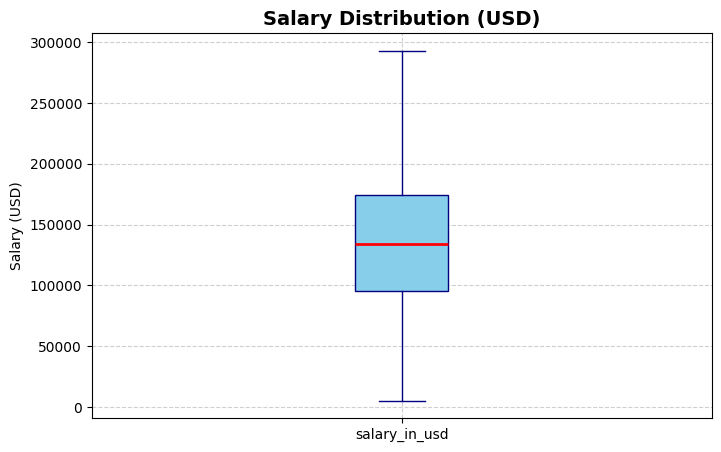

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,USD,342810,US,0,US,M
68,2023,SE,FT,Applied Scientist,USD,309400,US,0,US,L
83,2022,EN,FT,AI Developer,USD,300000,IN,50,IN,L
133,2023,SE,FT,Machine Learning Engineer,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,USD,318300,US,100,US,M


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


63


In [15]:
dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]
print("Df tem o seguinte numero de outliers: ",len(df)-len(dfSemOutlier))
plt.figure(figsize=(8, 5))
box = dfSemOutlier.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

dfApenasOutlier = df.loc[df['salary_in_usd'] >= superior]
display(dfApenasOutlier.head(5))
display(df.head(5))
print(len(dfApenasOutlier))


A variável "experience_level" possui 4 valores únicos
A variável "employment_type" possui 4 valores únicos
A variável "job_title" possui 93 valores únicos
A variável "salary_currency" possui 20 valores únicos
A variável "employee_residence" possui 78 valores únicos
A variável "company_location" possui 72 valores únicos
A variável "company_size" possui 3 valores únicos

{'Power BI Developer': 1, 'Product Data Scientist': 2, '3D Computer Vision Researcher': 3, 'Staff Data Analyst': 4, 'Product Data Analyst': 5, 'Autonomous Vehicle Technician': 6, 'Compliance Data Analyst': 7, 'Principal Data Architect': 8, 'Machine Learning Research Engineer': 9, 'Insight Analyst': 10, 'AI Scientist': 11, 'Data DevOps Engineer': 12, 'BI Data Analyst': 13, 'AI Programmer': 14, 'Business Data Analyst': 15, 'BI Data Engineer': 16, 'Big Data Engineer': 17, 'Finance Data Analyst': 18, 'Software Data Engineer': 19, 'Data Analytics Engineer': 20, 'Marketing Data Engineer': 21, 'Lead Data Analyst': 22, 'Data Man

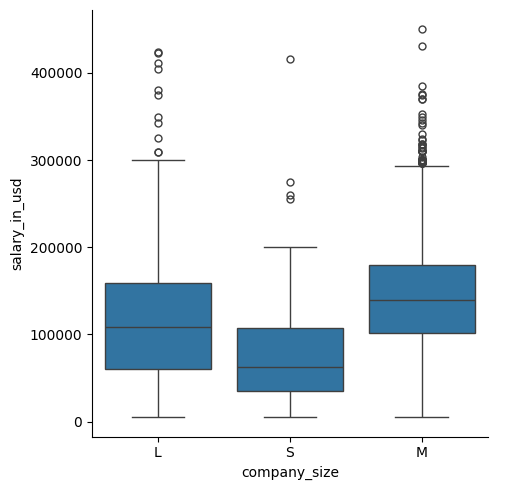

In [16]:
sns.catplot(data=df, x="company_size", y="salary_in_usd", kind="box")

cat = [col for col in df.columns if df[col].dtype=='object']
for col in cat:
  # print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')
  print(f'A variável "{col}" possui {df[col].nunique()} valores únicos')

print()
ordered_job_title = dict(df.groupby('job_title')['salary_in_usd'].median().sort_values())
ordered_job_title = list(ordered_job_title.keys())
job_title_map = {ordered_job_title[i]: i+1 for i in range(len(ordered_job_title))}
print(job_title_map)



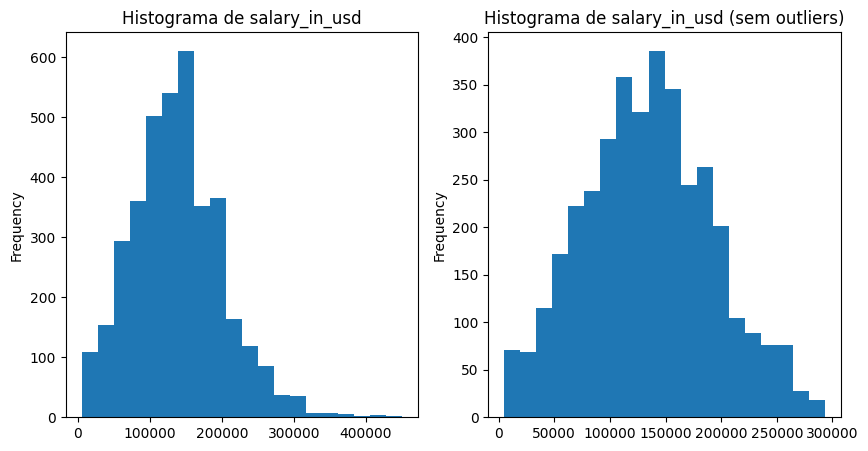

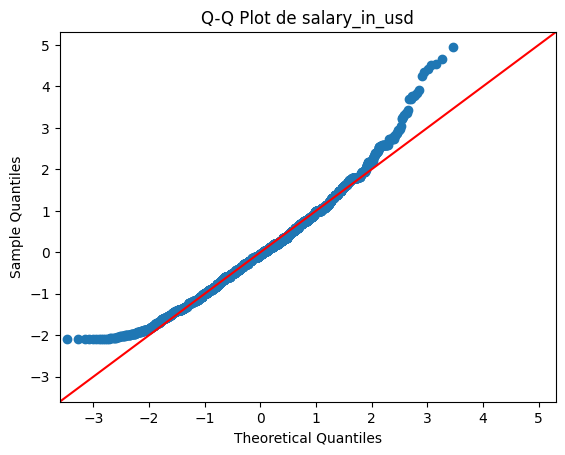

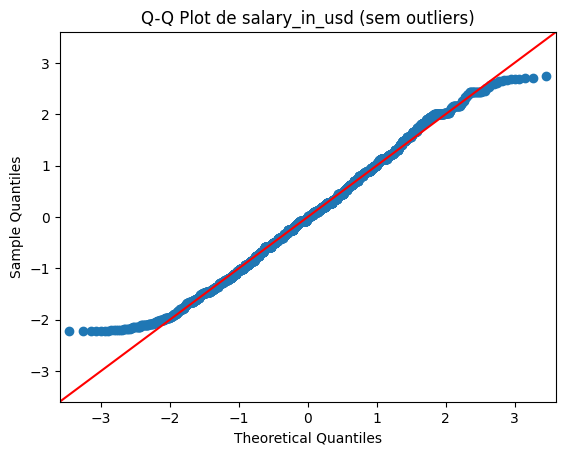

Para a distribuição de salários em USD
W=0.9827, p-valor=5.132455405327233e-21
Há evidências suficientes para rejeitar a hipótese de normalidade.
Para a distribuição de salários em USD (sem outliers)
W=0.9940, p-valor=2.7365635286993262e-11
Há evidências suficientes para rejeitar a hipótese de normalidade.


In [17]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize=(10, 5))

plt.subplot(121)
df.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd')

plt.subplot(122)
dfSemOutlier.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd (sem outliers)')

sm.qqplot(df['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd')

sm.qqplot(dfSemOutlier['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd (sem outliers)')

plt.show()



# Teste de Shapiro-Wilk para checar normalidade

alpha = .05
shapiro_test = stats.shapiro(df['salary_in_usd'])

print("Para a distribuição de salários em USD")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")


shapiro_test = stats.shapiro(dfSemOutlier['salary_in_usd'])

print("Para a distribuição de salários em USD (sem outliers)")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")

# Portanto, não podemos utilizar ANOVA para a feature selection, já que esta assume premissa de normalidade.
# Buscar outros testes para a feature selection que não assumam premissa de normalidade.



Como não decidimos utilizar ANOVA, utilizaremos K-Fold-Target-Encoder para transformar nosso dados categóricos em valores numéricos, o que vai nos permitir encontrar a correlação das features em relação ao target utilizando Spearman o Pearson.

In [18]:
from sklearn.preprocessing import TargetEncoder

enconder = TargetEncoder(target_type='continuous', smooth=1,cv=1000, shuffle=True)


def roda_target(df):
  cat = [col for col in df.columns if df[col].dtype=='object']
  print(cat)

  for col in cat:
    x = df[[col]]
    y = df['salary_in_usd']
    x_trans = enconder.fit_transform(x,y)
    df[[col]] = x_trans

  return df

df = roda_target(df)
df.head(5)

dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]

dfSemOutlier.head(5)



['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,153005.930163,138297.792880,204635.138930,62501.062417,85847,61109.856107,100,58009.765189,118414.877525
1,2023,104659.566652,124209.518342,159045.472634,149349.924433,30000,152877.816005,100,151871.385848,78953.578564
2,2023,104673.522228,124654.639643,161648.095473,149440.447405,25500,152842.851671,100,151846.120100,78984.367113
3,2023,153032.646905,138302.598199,140770.988068,149378.373294,175000,131782.199166,100,131487.291980,143117.833101
4,2023,153050.453167,138304.819518,140910.525473,149401.272108,120000,132429.527624,100,132119.958321,143079.727707


Agora, o primeiro passo para realizarmos feature selection é utilizarmos correlação de Pearson. Não utilizamos correlação de Spearman pois, como vimos anteriormente, os valores dos outliers não são discrepantes nesse dataset.
Abaixo, vemos um heatmap com as correlações entre todas as colunas. É importante perceber que, existem 3 colunas que possuem uma correlação muito alta entre si (para os padrões do dataset). Estas são company_location, employee_residence e salary_currency, o que pode indicar que devemos utilizar apenas uma delas, já que teríamos informação redundante caso contrário.

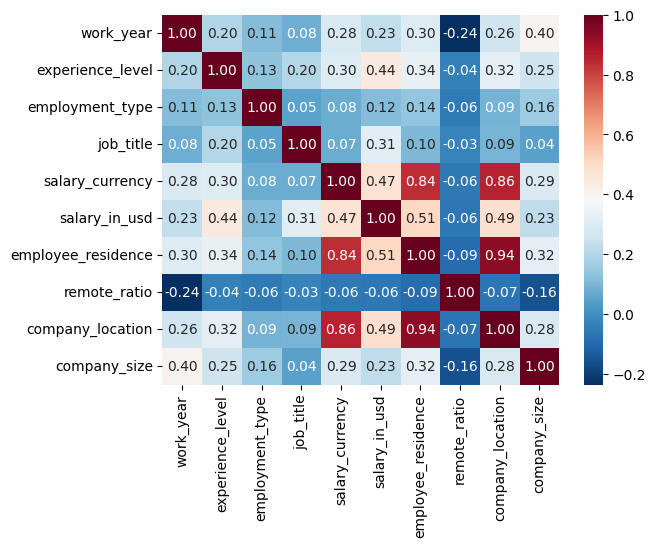

In [19]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True, cmap='RdBu_r', fmt='.2f')
plt.show()

Abaixo, vemos os índices de correlação em relação à variável dependente. Percebemos que há 5 features que apresentam um índice de correlação razoável.

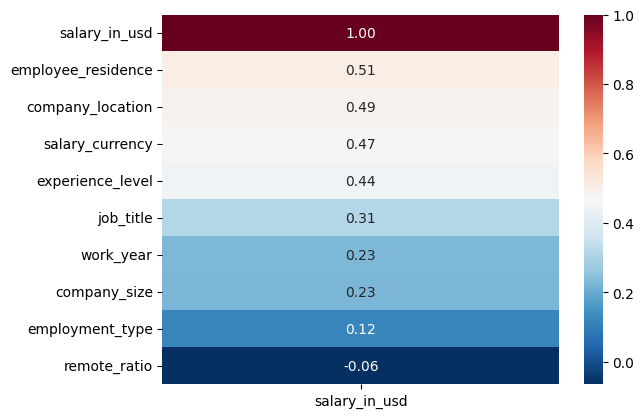

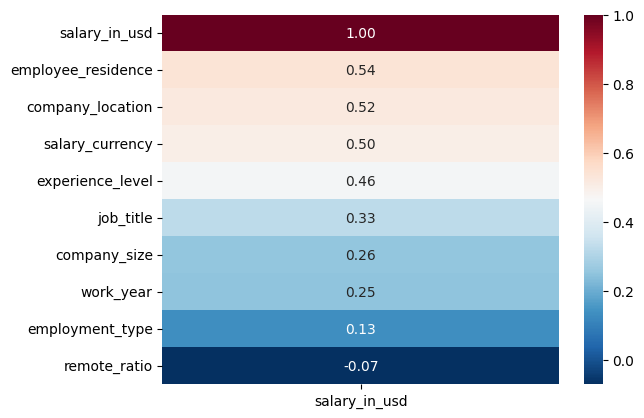

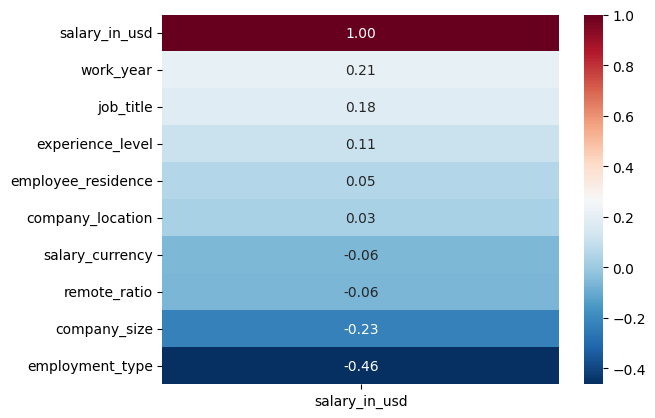

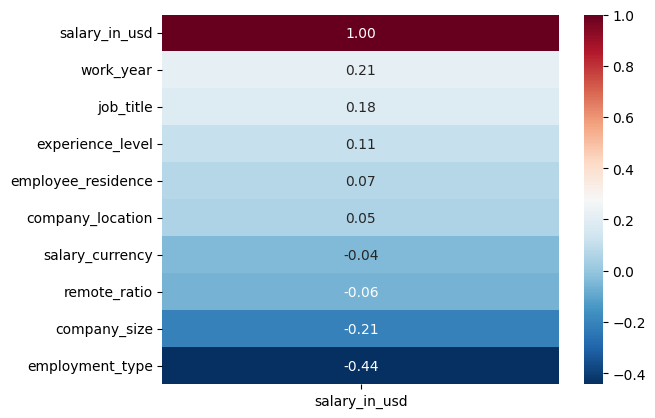

In [20]:
def plota_corr(metodo, df):
  corr = df.corr(method=metodo)
  salario_in_usd_corr = corr['salary_in_usd']
  sns.heatmap(salario_in_usd_corr.sort_values(ascending=False).to_frame(),annot=True, cmap='RdBu_r', fmt='.2f')
  plt.show()

plota_corr('pearson', df)
plota_corr('pearson', dfSemOutlier)
plota_corr('spearman', df)
plota_corr('spearman', dfSemOutlier)

Dessa forma, selecionaremos apenas 1 feature dentre as 3 que possuem índice de correlação alto entre si. Dentre essas 3, selecionamos employee residence, já que possui a maior correlação com a feature principal. Além disso, selecionamos as features experience_level e job_title, ambas com índice maior que 0.3.

In [21]:

dfSelecionado = df[['employee_residence','experience_level' ,'job_title','company_size', 'salary_in_usd']]
dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,61109.856107,153005.930163,204635.138930,118414.877525,85847
1,152877.816005,104659.566652,159045.472634,78953.578564,30000
2,152842.851671,104673.522228,161648.095473,78984.367113,25500
3,131782.199166,153032.646905,140770.988068,143117.833101,175000
4,132429.527624,153050.453167,140910.525473,143079.727707,120000


Normalizando os dados, temos:

In [22]:
# Supondo que df já está carregado


scaler = MinMaxScaler()

# dfNormalizado = df[['employee_residence','experience_level' ,'job_title','company_size']]

dfSelecionado = pd.DataFrame(scaler.fit_transform(dfSelecionado), columns=dfSelecionado.columns)
# dfSelecionado = pd.concat([dfNormalizado, df[['salary_in_usd']]], axis=1)

dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,0.204978,0.635488,0.697741,0.628798,0.181436
1,0.897047,0.225663,0.491027,0.038992,0.055900
2,0.896783,0.225781,0.502828,0.039452,0.045784
3,0.737954,0.635715,0.408167,0.998019,0.381839
4,0.742836,0.635866,0.408799,0.997449,0.258207


In [23]:
df.to_csv("ds_salaries_processed.csv", index=False)

Dado que terminamos nossa seleção de features, podemos começar a realizar o treinamento do nosso modelo.

In [24]:
from lightgbm import LGBMRegressor


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

model_knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(
        n_neighbors=5,
        weights='distance',
        metric='euclidean'
    ))
])

model_bayes = Pipeline([
    ('scale', StandardScaler()),
    ('bayes', BayesianRidge())
])

model_lgbm = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100,force_col_wise=True)

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6)


model_cb = CatBoostRegressor(
    depth=8,
    learning_rate=0.1,
    iterations=100,
    verbose=False
)


model_svr = Pipeline([
    ('scale', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
])

model_reg = LinearRegression()


In [26]:
X = dfSelecionado.drop('salary_in_usd', axis=1)
y = dfSelecionado['salary_in_usd']

def run_101_times_fold(model, n_splits):
    r2 = 0
    r2_list = []
    mse = 0
    for i in range(101):
        kfold_i = KFold(n_splits=n_splits, shuffle=True, random_state=i)

        cur_r2 = cross_val_score(model, X, y, cv=kfold_i, scoring="r2")
        r2_list.append(np.mean(cur_r2))
        r2 += np.mean(cur_r2)

        cur_mse = cross_val_score(model, X, y, cv=kfold_i, scoring=make_scorer(mean_squared_error))
        mse += np.mean(cur_mse)

    print("R² médio:", r2/101)
    print("MSE médio:", mse/101)

    return r2_list



In [27]:
print("Resultados do KNNRegressor: ")
r2_knn = run_101_times_fold(model_knn, 10)

Resultados do KNNRegressor: 
R² médio: 0.6981323454659812
MSE médio: 0.006055274178990833


In [28]:
print("Resultados do BayesianRidge: ")
r2_bayes = run_101_times_fold(model_bayes, 10)

Resultados do BayesianRidge: 
R² médio: 0.38550181328885963
MSE médio: 0.01232398669832925


In [29]:
print("Resultados do LightGBM: ")
r2_lgbm = run_101_times_fold(model_lgbm, 10)

Resultados do LightGBM: 
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.296457
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.296668
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.297283
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.297800
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3379, number of used features: 4
[LightGBM] [Info] Start training from score 0.298345
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the trai

In [30]:
print("Resultados do XGB: ")
r2_xgb = run_101_times_fold(model_xgb, 10)

Resultados do XGB: 
R² médio: 0.7747934506026397
MSE médio: 0.004513224479752893


In [31]:
print("Resultados do CatBoost: ")
r2_cb = run_101_times_fold(model_cb, 10)

Resultados do CatBoost: 
R² médio: 0.7526794839330765
MSE médio: 0.004956953322271204


In [32]:
print("Resultados do SVR: ")
r2_svr = run_101_times_fold(model_svr, 10)

Resultados do SVR: 
R² médio: 0.42204808053619774
MSE médio: 0.011574849602506756


In [36]:
print("Resultados da Regressão Linear: ")
r2_reg = run_101_times_fold(model_reg, 10)

Resultados da Regressão Linear: 
R² médio: 0.3854969092363034
MSE médio: 0.012324034180685261


In [ ]:
from scipy.stats import ttest_rel

In [37]:
from scipy.stats import mannwhitneyu
import numpy as np

from scipy.stats import friedmanchisquare
import numpy as np

def verificaModelosFriedman(nomes, *r2_listas):

    # r2_listas → listas pareadas (ex: r2_modelo1, r2_modelo2, r2_modelo3)
    stat, p_value = friedmanchisquare(*r2_listas)

    print("\nTeste de Friedman (R²):")
    print("estatística =", stat)
    print("p =", p_value)

    alpha = 0.005
    if p_value < alpha:
        print("\nConclusão: Existe diferença estatisticamente significativa entre os modelos.")

        medianas = [np.median(lst) for lst in r2_listas]
        ranking = sorted(zip(nomes, medianas), key=lambda x: x[1], reverse=True)

        print("\nRanking pela mediana do R²:")
        for i, (nome, med) in enumerate(ranking, 1):
            print(f"{i}. {nome} — mediana = {med:.4f}")

        # print(f"\n→ O modelo mais robusto é: {ranking[0][0]}")

    else:
        print("\nConclusão: NÃO há diferença estatística entre os modelos.")


verificaModelosFriedman(['Knn','Bayes','LightGBM','XGB','CatBoost','SVR','RegressãoLinear'], r2_knn,r2_bayes,r2_lgbm,r2_xgb, r2_cb,r2_svr,r2_reg)




Teste de Friedman (R²):
estatística = 601.0608203677511
p = 1.377013604424553e-126

Conclusão: Existe diferença estatisticamente significativa entre os modelos.

Ranking pela mediana do R²:
1. LightGBM — mediana = 0.7843
2. XGB — mediana = 0.7745
3. CatBoost — mediana = 0.7527
4. Knn — mediana = 0.6981
5. SVR — mediana = 0.4223
6. Bayes — mediana = 0.3855
7. RegressãoLinear — mediana = 0.3855


In [38]:
from scipy.stats import wilcoxon
import numpy as np

def wilcoxon_paired(nome1, r2_1, nome2, r2_2):
 
    # -------- TESTE DE WILCOXON --------
    stat, p = wilcoxon(r2_1, r2_2)

    print(f"\nWilcoxon signed-rank test: {nome1} vs {nome2}")
    print(f"stat = {stat}")
    print(f"p    = {p}")

    # -------- INTERPRETAÇÃO --------
    alpha = 0.05
    if p < alpha:
        print("Conclusão: Existe diferença estatisticamente significativa entre os modelos.")

        mean1 = np.mean(r2_1)
        mean2 = np.mean(r2_2)

        if mean1 > mean2:
            print(f"{nome1} é estatisticamente mais robusto que {nome2}.")
        else:
            print(f"{nome2} é estatisticamente mais robusto que {nome1}.")
    else:
        print("Conclusão: NÃO há diferença estatística entre os modelos.")


In [ ]:
wilcoxon_paired('Knn',r2_knn,'Bayes', r2_bayes)
wilcoxon_paired('Knn',r2_knn,'XGB', r2_xgb)
# # verificaModelos('RamdomForest',r2_rf,'LGBM', r2_lgbm)
# # verificaModelos('RamdomForest',r2_rf,'XGB', r2_xgb)
wilcoxon_paired('CatBoost',r2_cb,'LGBM', r2_lgbm)
# # verificaModelos('RamdomForest',r2_rf,'CatBoost', r2_cb)
wilcoxon_paired('CatBoost',r2_cb,'XGB', r2_xgb)
wilcoxon_paired('XGB',r2_xgb,'LGBM', r2_lgbm)


Wilcoxon signed-rank test: Knn vs Bayes
stat = 0.0
p    = 2.6651409486700556e-18
Conclusão: Existe diferença estatisticamente significativa entre os modelos.
Knn é estatisticamente mais robusto que Bayes.

Wilcoxon signed-rank test: Knn vs XGB
stat = 0.0
p    = 2.6651409486700556e-18
Conclusão: Existe diferença estatisticamente significativa entre os modelos.
XGB é estatisticamente mais robusto que Knn.

Wilcoxon signed-rank test: CatBoost vs LGBM
stat = 0.0
p    = 2.6651409486700556e-18
Conclusão: Existe diferença estatisticamente significativa entre os modelos.
LGBM é estatisticamente mais robusto que CatBoost.

Wilcoxon signed-rank test: CatBoost vs XGB
stat = 0.0
p    = 2.6651409486700556e-18
Conclusão: Existe diferença estatisticamente significativa entre os modelos.
XGB é estatisticamente mais robusto que CatBoost.

Wilcoxon signed-rank test: XGB vs LGBM
stat = 329.0
p    = 2.7340574409435298e-14
Conclusão: Existe diferença estatisticamente significativa entre os modelos.
LGBM é